In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE=256
BATCH_SIZE=32
EPOCH=50

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_name= dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

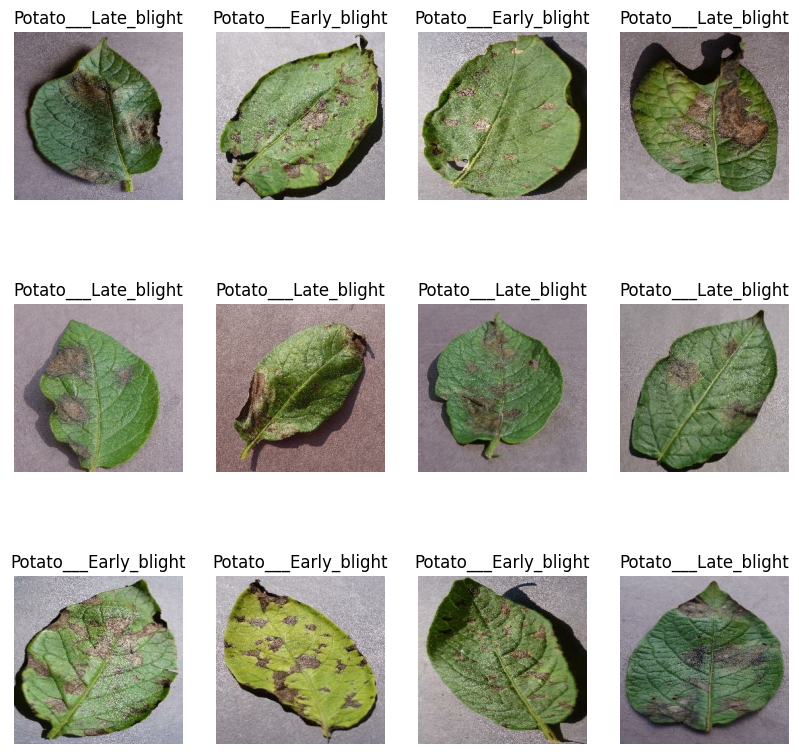

In [7]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[labels_batch[i]])
        plt.axis("off")

In [8]:
train_size=0.8
val_size=0.1
test_size=0.1
len(dataset)*train_size

54.400000000000006

In [9]:
train_ds=dataset.take(54)
len(train_ds)

54

In [10]:
test_ds= dataset.skip(len(train_ds))
len(test_ds)

14

In [11]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [12]:
val_ds=dataset.take(6)
len(val_ds)

6

In [13]:
test_size=0.1
len(dataset)*test_size

6.800000000000001

In [14]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [15]:
resize_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255.0)
])

In [16]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [17]:
input_shape=(32,IMAGE_SIZE,IMAGE_SIZE,3)
model= models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation="relu",input_shape=(IMAGE_SIZE, IMAGE_SIZE)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(3,activation="softmax"),
])
model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics="accuracy")

In [22]:
hisory= model.fit(
    test_ds,
    epochs=EPOCH,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data= val_ds
)

Epoch 1/50


8/8 [==============================] - 40s 4s/step - loss: 0.8417 - accuracy: 0.6466 - val_loss: 0.6620 - val_accuracy: 0.8125
Epoch 2/50
8/8 [==============================] - 32s 3s/step - loss: 0.7399 - accuracy: 0.6767 - val_loss: 0.6156 - val_accuracy: 0.7969
Epoch 3/50
8/8 [==============================] - 19s 2s/step - loss: 0.5631 - accuracy: 0.7716 - val_loss: 0.7982 - val_accuracy: 0.6875
Epoch 4/50
8/8 [==============================] - 15s 2s/step - loss: 0.4942 - accuracy: 0.8190 - val_loss: 0.5057 - val_accuracy: 0.7969
Epoch 5/50
8/8 [==============================] - 15s 2s/step - loss: 0.4420 - accuracy: 0.8448 - val_loss: 0.4637 - val_accuracy: 0.8646
Epoch 6/50
8/8 [==============================] - 14s 2s/step - loss: 0.4187 - accuracy: 0.8534 - val_loss: 0.3635 - val_accuracy: 0.8542
Epoch 7/50
8/8 [==============================] - 18s 2s/step - loss: 0.3692 - accuracy: 0.8534 - val_loss: 0.4081 - val_accuracy: 0.8229
Epoch 8/50
8/8 [=============================

In [24]:
scores= model.evaluate(test_ds)

8/8 [==============================] - 6s 301ms/step - loss: 0.1458 - accuracy: 0.9483


In [25]:
acc=hisory.history['accuracy']
val_acc=hisory.history['val_accuracy']

loss=hisory.history['loss']
val_loss=hisory.history['val_loss']

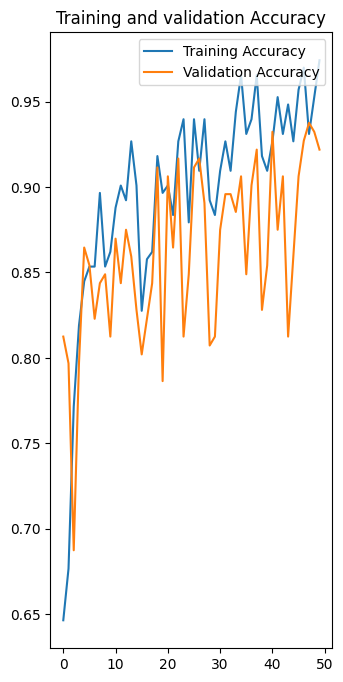

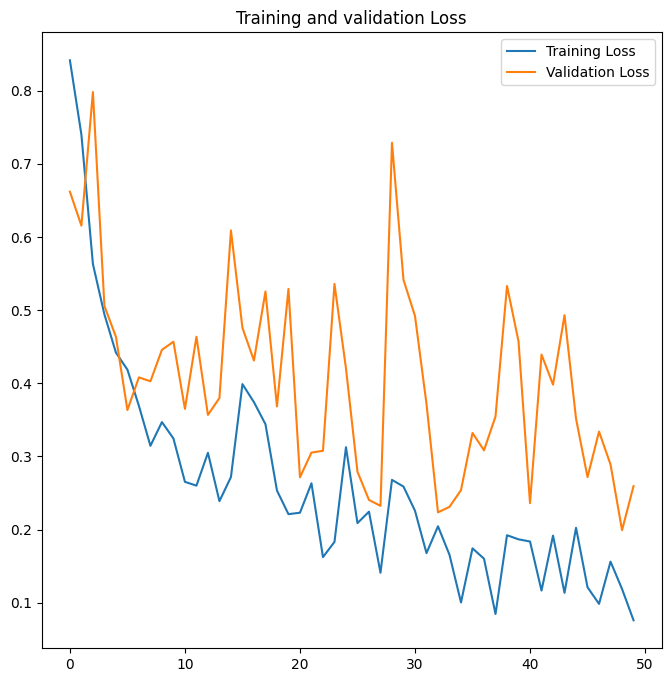

In [26]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and validation Accuracy')
plt.show()

plt.figure(figsize=(8,8))
plt.plot(range(EPOCH), loss, label ='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and validation Loss')
plt.show()

first image to predict
actual label of first image: Potato___Early_blight
1/1 [==============================] - 2s 2s/step
predicted label: Potato___Early_blight


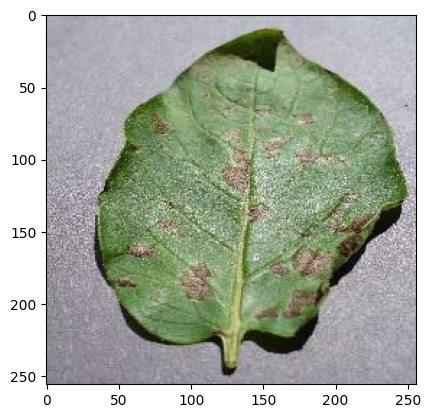

In [37]:
import numpy as np
for image_batch, labels_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_lable=labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label of first image:", class_name[first_lable])
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img )